<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebooks/bt_edmonds_karp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (442/442), done.
remote: Compressing objects: 100% (411/411), done.
remote: Total 442 (delta 248), reused 52 (delta 16), pack-reused 0
Receiving objects: 100% (442/442), 512.70 KiB | 5.63 MiB/s, done.
Resolving deltas: 100% (248/248), done.


In [2]:
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx
import numpy as np

In [19]:
def bfs(G, s, t):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  q = [s]
  visited[s] = True
  while q:
    u = q[0]
    if u == t:
      break
    q = q[1:]
    for v in range(n):
      if G[u][v] > 0 and not visited[v]:
        visited[v] = True
        path[v] = u
        q.append(v)
    
  if path[t] == -1:
    return None, 0

  bottleneck = np.Inf
  cpath = []
  while t != -1:
    cpath = [t] + cpath
    if path[t] > -1:
      bottleneck = bottleneck if bottleneck < G[path[t], t] else G[path[t], t]
    t = path[t]
 
  return cpath, bottleneck

In [15]:
def edmondsKarp(G, s, t):
  n = len(G)
  Gres = G.copy()
  Gflow = np.zeros((n, n))
  
  while True:
    path, bottleneck = bfs(Gres, s, t)
    if path != None:
      for i in range(1, len(path)):
        u = path[i - 1]
        v = path[i]
        Gres[u][v] -= bottleneck
        Gres[v][u] += bottleneck
        Gflow[u][v] = Gflow[u][v] - Gflow[v][u] + bottleneck
    else:
      break

  return Gflow, np.sum(Gflow[s])

Node | Number
-- | --
S | 0
a | 1
b | 2
c | 3
d | 4
t | 5

In [5]:
%%file 1.adjmatrix
0 16  0 13  0  0
0  0 12 10  0  0
0  0  0  9  0 20
0  4  0  0 14  0
0  0  7  0  0  4 
0  0  0  0  0  0

Writing 1.adjmatrix


In [6]:
G = np.fromfile("1.adjmatrix", sep=" ").reshape((6, 6))
G

array([[ 0., 16.,  0., 13.,  0.,  0.],
       [ 0.,  0., 12., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  9.,  0., 20.],
       [ 0.,  4.,  0.,  0., 14.,  0.],
       [ 0.,  0.,  7.,  0.,  0.,  4.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

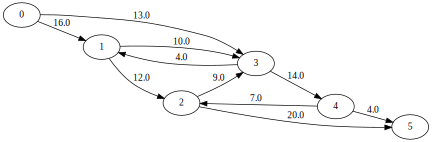

In [7]:
Gnx = nx.from_numpy_matrix(G, create_using=nx.DiGraph)
gs.nx2gv(Gnx, weighted=True)

In [8]:
bfs(G, 0, 5)

([0, 1, 2, 5], 12.0)

23.0


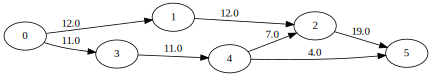

In [20]:
Gf, fm = edmondsKarp(G, 0, 5)
print(fm)
Gnx = nx.from_numpy_matrix(Gf, create_using=nx.DiGraph)
gs.nx2gv(Gnx, weighted=True)